* NO.1_i. How many training and test examples are there? You can use np.loadtxt for this purpose.
Show some objects of each class using plt.matshow

Answer:

There are 3000 training examples in Xtrain.csv and Ytrain.csv, respectively. And there are 5000 test examples in Xtest.csv. The first image has an associated label "1.0" and the second image has an associated label "-1.0".

3000
3000
5000
1.0
-1.0


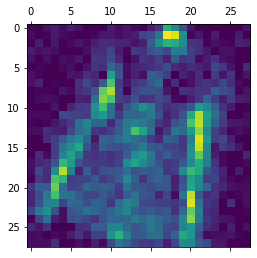

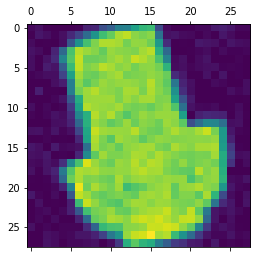

In [2]:
import numpy as np #importinga numpy
xtrain= np.loadtxt("Xtrain.csv")
ytrain= np.loadtxt("Ytrain.csv")
test= np.loadtxt("Xtest.csv")
print(len(xtrain))
print(len(ytrain))
print(len(test))

import matplotlib.pyplot as plt

plt.matshow(xtrain[0].reshape((28,28)))# show the first example
print(ytrain[0])

plt.matshow(xtrain[1].reshape((28,28)))# show the second example
print(ytrain[1])

* NO.1_ii. How many positive and negative examples are there in the training dataset?

Answer to NO.1_ii:

positive:1179; negative:1821.

In [22]:
p=0
n=0
for a in ytrain:
    if a>0:
        p=p+1
    elif a<0:
        n=n+1
print(p,n)
    

1179 1821


* NO.1_iii. Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your
reasoning.

Answer to NO.1_iii: AUC-ROC

By looking at the samples, we may say that the dataset is somewhat class-balanced, so we should use the AUC-ROC performance metric.

In [23]:
print(p/n)

0.6474464579901154


* NO.1_iv. What is the expected accuracy of a random classifier (one that generates random labels for a
given example) for this problem over the training and test datasets? Demonstrate why this
would be the case.

Answer to NO.1_iv:

The expected accuracy of a random classifier is 0.5. As the dataset is binominal, there are two classes of data. 1/2=0.5. Hence, the accuracy should be 50%. 

* NO.1_v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training
and test datasets? Demonstrate why this would be the case.

Answer to NO.1_v:


The AUC-ROC and AUC-PR of a random classifier are both 0.5.

Reasoning:
T:True;
F:False;
P:Positive;
N:Negative;
R:Rate;


For ROC:


TPR=TP/(TP+FN);FPR=FP/(FP+TN);


TPR represents the percentage of all those "Samples should be classified as 1" that is exactly classified as 1; 


FPR represents the percentage of all the "Samples should be classified as 0" that is misclassified as 1; 


In this case, if it is a random classifier, the possibility that we get a sample that is classified as 0 or 1 should be the same. ROC is the plot of TPR vs FPR and in this case the curve should be like the function y=x. Therefore,AUC=area(curve ROC)=0.5



For PR:


Recall =TP/(TP+FN);


Precision=TP/(TP+FP);


Analogous to ROC, if it is a random classifier, we should get same possibility of Recall and Precision, and thus,AUC=area(curve PR)=0.5

* Question No. 2: (Nearest Neighbor Classifier)
Perform 5-fold stratified cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) over the training dataset using the k = 1 nearest neighbour classifier and answer the following questions:


In [3]:
#This block is preliminary steps for some of the following codes.
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)        
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:            
            conts = sorted([-1+eps,0,1-eps])
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

def getExamples(n=100,d=2):
    """
    Generates n d-dimensional normally distributed examples of each class        
    The mean of the positive class is [1] and for the negative class it is [-1]
    """
    Xp = randn(n,d)#+1   #generate n examples of the positie class
    Xp=Xp+1
    Xn1 = randn(int(n/2),d)#-1   #generate n examples of the negative class
    Xn1=Xn1-1
    Xn2 = randn(int(n/2),d)#-1   #generate n examples of the negative class
    Xn2=Xn2+2
    Xn = np.vstack((Xn1,Xn2))  #Stack the examples together to a single matrix
    X = np.vstack((Xp,Xn))  #Stack the examples together to a single matrix
    Y = np.array([+1]*n+[-1]*n) #Associate Labels
    return (X,Y) 
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
def plotROC(y,z,pstr = ''):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.figure()
    plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

* NO.2_i. What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results.

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,average_precision_score

Accuracy = []
AUC_ROC = []
AUC_PR = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC.append(b)
    c = average_precision_score(yv,p)
    AUC_PR.append(c)
    print('Fold ',i,'Accuracy:',a)
    print('Fold ',i,'AUC ROC:',b)
    print('Fold ',i,'AUC PR:',c)



Fold  0 Accuracy: 0.7304492512479202
Fold  0 AUC ROC: 0.7324065474808452
Fold  0 AUC PR: 0.5716676097848873
Fold  1 Accuracy: 0.745
Fold  1 AUC ROC: 0.7369389085490782
Fold  1 AUC PR: 0.5853785539467966
Fold  2 Accuracy: 0.7566666666666667
Fold  2 AUC ROC: 0.7458092754702924
Fold  2 AUC PR: 0.5988491667853582
Fold  3 Accuracy: 0.7616666666666667
Fold  3 AUC ROC: 0.7521652076736824
Fold  3 AUC PR: 0.6053474224629017
Fold  4 Accuracy: 0.7395659432387313
Fold  4 AUC ROC: 0.7336859948562076
Fold  4 AUC PR: 0.5786685655696449


* NO.2_ii. What is the mean and standard deviation of each performance metric (accuracy, AUC-ROC and AUC-PR)across all the folds for this classifier? Show code to demonstrate the results.

In [6]:
print('Accuracy',Accuracy)
print('Mean AUC',np.mean(Accuracy))
print('Stdev AUC',np.std(Accuracy))
print("\n")

print('AUC-ROC',AUC_ROC)
print('Mean AUC-ROC',np.mean(AUC_ROC))
print('Stdev AUC-ROC',np.std(AUC_ROC))
print("\n")

print('AUC-PR',AUC_PR)
print('Mean AUC-PR',np.mean(AUC_PR))
print('Stdev AUC-PR',np.std(AUC_PR))

Accuracy [0.7304492512479202, 0.745, 0.7566666666666667, 0.7616666666666667, 0.7395659432387313]
Mean AUC 0.746669705563997
Stdev AUC 0.011324332807433056


AUC-ROC [0.7324065474808452, 0.7369389085490782, 0.7458092754702924, 0.7521652076736824, 0.7336859948562076]
Mean AUC-ROC 0.7402011868060211
Stdev AUC-ROC 0.007595196397281383


AUC-PR [0.5716676097848873, 0.5853785539467966, 0.5988491667853582, 0.6053474224629017, 0.5786685655696449]
Mean AUC-PR 0.5879822637099178
Stdev AUC-PR 0.012484634806349442


* NO.2_iii. What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) on the cross-validation performance? Show code to demonstrate the results.


Answer: 

To some extend, the pre-processing operation can generally increase the accuracy, AUC-ROC, and AUC-PR, like Standardaization, Minimum_maximum_scaler and Normalization. However, some pre-processing methods may do the oppsite i.e Feature binarization.

Coding as follows:

In [12]:
#Standardization 
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(xtrain)
std_xtrain = scaler.transform(xtrain)

Accuracy_std = []
AUC_ROC_std = []
AUC_PR_std = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(std_xtrain, ytrain)):
    Xtr, Xv = std_xtrain[tr_idx], std_xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_std.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_std.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_std.append(c)
    
print('Accuracy std',Accuracy_std)
print('Mean AUC std',np.mean(Accuracy_std))
print('Stdev AUC std',np.std(Accuracy_std))
print("\n")

print('AUC-ROC std',AUC_ROC_std)
print('Mean AUC-ROC std',np.mean(AUC_ROC_std))
print('Stdev AUC-ROC std',np.std(AUC_ROC_std))
print("\n")

print('AUC-PR std',AUC_PR_std)
print('Mean AUC-PR std',np.mean(AUC_PR_std))
print('Stdev AUC-PR std',np.std(AUC_PR_std))


Accuracy std [0.7670549084858569, 0.76, 0.7466666666666667, 0.7316666666666667, 0.7829716193656093]
Mean AUC std 0.7576719722369599
Stdev AUC std 0.017498137153710847


AUC-ROC std [0.7573020664035292, 0.7493015459117155, 0.739802570311045, 0.7199897560067051, 0.7784486789805939]
Mean AUC-ROC std 0.7489689235227177
Stdev AUC-ROC std 0.01929985528911615


AUC-PR std [0.6114498434812036, 0.603039927835541, 0.5876949152542372, 0.5686746802827223, 0.6323121112679251]
Mean AUC-PR std 0.6006342956243259
Stdev AUC-PR std 0.021517861059478033


In [32]:
#Minimum_maximum_scaler
from sklearn import preprocessing
import numpy as np
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(xtrain)

Accuracy_mm = []
AUC_ROC_mm = []
AUC_PR_mm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x_train_minmax, ytrain)):
    Xtr, Xv = x_train_minmax[tr_idx], x_train_minmax[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_mm.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_mm.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_mm.append(c)
    
print('Accuracy mm',Accuracy_mm)
print('Mean AUC mm',np.mean(Accuracy_mm))
print('Stdev AUC mm',np.std(Accuracy_mm))
print("\n")

print('AUC-ROC mm',AUC_ROC_mm)
print('Mean AUC-ROC mm',np.mean(AUC_ROC_mm))
print('Stdev AUC-ROC mm',np.std(AUC_ROC_mm))
print("\n")

print('AUC-PR mm',AUC_PR_mm)
print('Mean AUC-PR mm',np.mean(AUC_PR_mm))
print('Stdev AUC-PR mm',np.std(AUC_PR_mm))



Accuracy mm [0.7687188019966722, 0.7116666666666667, 0.7433333333333333, 0.7366666666666667, 0.7729549248747913]
Mean AUC mm 0.7466680787076261
Stdev AUC mm 0.02242088443113574


AUC-ROC mm [0.7624158346877176, 0.7042512572173589, 0.7392903706463028, 0.7226205997392439, 0.7679448211363105]
Mean AUC-ROC mm 0.7393045766853867
Stdev AUC-ROC mm 0.02392272703074446


AUC-PR mm [0.614133711302527, 0.5481014269444631, 0.5846419655761398, 0.5737967562828755, 0.6193667414666274]
Mean AUC-PR mm 0.5880081203145266
Stdev AUC-PR mm 0.026350512959441283


In [34]:
#Nomalization
from sklearn import preprocessing
import numpy as np
normalizer = preprocessing.Normalizer()
x_train_norm = normalizer.fit_transform(xtrain)

Accuracy_norm = []
AUC_ROC_norm = []
AUC_PR_norm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x_train_norm, ytrain)):
    Xtr, Xv = x_train_norm[tr_idx], x_train_norm[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_norm.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_norm.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_norm.append(c)
    
print('Accuracy norm',Accuracy_norm)
print('Mean AUC norm',np.mean(Accuracy_norm))
print('Stdev AUC norm',np.std(Accuracy_norm))
print("\n")

print('AUC-ROC norm',AUC_ROC_norm)
print('Mean AUC-ROC norm',np.mean(AUC_ROC_norm))
print('Stdev AUC-ROC norm',np.std(AUC_ROC_norm))
print("\n")

print('AUC-PR norm',AUC_PR_norm)
print('Mean AUC-PR norm',np.mean(AUC_PR_norm))
print('Stdev AUC-PR norm',np.std(AUC_PR_norm))



Accuracy norm [0.7853577371048253, 0.7533333333333333, 0.7583333333333333, 0.76, 0.7145242070116862]
Mean AUC norm 0.7543097221566356
Stdev AUC norm 0.02278766548614495


AUC-ROC norm [0.7843510564197819, 0.7527472527472527, 0.7516530080089402, 0.7567517228534179, 0.7123275660509703]
Mean AUC-ROC norm 0.7515661212160726
Stdev AUC-ROC norm 0.02299047312738977


AUC-PR norm [0.636168543476741, 0.5973934837092731, 0.6017976992716629, 0.6046393378005519, 0.5523917508757864]
Mean AUC-PR norm 0.5984781630268031
Stdev AUC-PR norm 0.026812974799935704


In [13]:
#Feature binarization
from sklearn import preprocessing
import numpy as np
binarizer = preprocessing.Binarizer()
x_train_bina = binarizer.fit_transform(xtrain)

Accuracy_bina = []
AUC_ROC_bina = []
AUC_PR_bina = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x_train_bina, ytrain)):
    Xtr, Xv = x_train_bina[tr_idx], x_train_bina[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_bina.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_bina.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_bina.append(c)
    
print('Accuracy bina',Accuracy_bina)
print('Mean AUC bina',np.mean(Accuracy_bina))
print('Stdev AUC bina',np.std(Accuracy_bina))
print("\n")

print('AUC-ROC bina',AUC_ROC_bina)
print('Mean AUC-ROC bina',np.mean(AUC_ROC_bina))
print('Stdev AUC-ROC bina',np.std(AUC_ROC_bina))
print("\n")

print('AUC-PR bina',AUC_PR_bina)
print('Mean AUC-PR bina',np.mean(AUC_PR_bina))
print('Stdev AUC-PR bina',np.std(AUC_PR_bina))


Accuracy bina [0.5041597337770383, 0.5033333333333333, 0.5566666666666666, 0.475, 0.48914858096828046]
Mean AUC bina 0.5056616629490638
Stdev AUC bina 0.027647809191963163


AUC-ROC bina [0.5064197817506385, 0.5079623766064445, 0.5548984913391694, 0.46896535667722106, 0.48164601356090714]
Mean AUC-ROC bina 0.5039784039868761
Stdev AUC-ROC bina 0.029459588602796516


AUC-PR bina [0.3957877707236951, 0.3972039330725771, 0.42316913841807907, 0.37968818283824485, 0.38398529742094323]
Mean AUC-PR bina 0.39596686449470786
Stdev AUC-PR bina 0.015166275388920476


* NO.2_iv. Use 5-fold cross-validation over training data to calculate the optimal value of k for the k-Nearest neighbour classifier. 
What is the optimal value of k and what are the cross-validation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy_knn = []
AUC_ROC_knn = []
AUC_PR_knn = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_knn.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_knn.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_knn.append(c)
    
print('Accuracy knn',Accuracy_knn)
print('Mean AUC knn',np.mean(Accuracy_nn))
print('Stdev AUC knn',np.std(Accuracy_nn))
print("\n")

print('AUC-ROC knn',AUC_ROC_nn)
print('Mean AUC-ROC knn',np.mean(AUC_ROC_nn))
print('Stdev AUC-ROC knn',np.std(AUC_ROC_nn))
print("\n")

print('AUC-PR knn',AUC_PR_nn)
print('Mean AUC-PR knn',np.mean(AUC_PR_nn))
print('Stdev AUC-PR knn',np.std(AUC_PR_nn))




Accuracy kmm [0.7687188019966722, 0.7116666666666667, 0.7433333333333333, 0.7366666666666667, 0.7729549248747913]
Mean AUC knn 0.7466680787076261
Stdev AUC knn 0.02242088443113574


AUC-ROC knn [0.7624158346877176, 0.7042512572173589, 0.7392903706463028, 0.7226205997392439, 0.7679448211363105]
Mean AUC-ROC knn 0.7393045766853867
Stdev AUC-ROC knn 0.02392272703074446


AUC-PR knn [0.614133711302527, 0.5481014269444631, 0.5846419655761398, 0.5737967562828755, 0.6193667414666274]
Mean AUC-PR knn 0.5880081203145266
Stdev AUC-PR knn 0.026350512959441283


In [15]:
#For KNeighborsClassifier, the parameter "n_neighbors" plays an important role in the classifying,
#and we apply the "weights" parameter using "uniform" and "distance" in case that points in the distance have 
#different features but weighted equally to those points closer. And actually "distance" get a better result. 
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'weights':['uniform','distance'],
        'n_neighbors':[i for i in range(1,11)]
    }
]
 
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf,param_grid, n_jobs = -1, cv = skf)
 
grid_search.fit(xtrain, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.7723333333333333
{'n_neighbors': 6, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')


In [16]:
#Optimal knn result of accuracy is presented as follow.
from sklearn.neighbors import KNeighborsClassifier

Accuracy_knn = []
AUC_ROC_knn = []
AUC_PR_knn = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=7,weights="distance") 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_knn.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_knn.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_knn.append(c)
    
print('Accuracy knn',Accuracy_knn)
print('Mean AUC knn',np.mean(Accuracy_knn))
print('Stdev AUC knn',np.std(Accuracy_knn))
print("\n")

print('AUC-ROC knn',AUC_ROC_knn)
print('Mean AUC-ROC knn',np.mean(AUC_ROC_knn))
print('Stdev AUC-ROC knn',np.std(AUC_ROC_knn))
print("\n")

print('AUC-PR knn',AUC_PR_knn)
print('Mean AUC-PR knn',np.mean(AUC_PR_knn))
print('Stdev AUC-PR knn',np.std(AUC_PR_knn))


Accuracy knn [0.7886855241264559, 0.7616666666666667, 0.7633333333333333, 0.7616666666666667, 0.7662771285475793]
Mean AUC knn 0.7683258638681404
Stdev AUC knn 0.010318219401863444


AUC-ROC knn [0.7840956582307871, 0.7655755261687465, 0.7594989756006705, 0.7618504376978953, 0.7707446808510638]
Mean AUC-ROC knn 0.7683530557098326
Stdev AUC-ROC knn 0.008740055501988187


AUC-PR knn [0.6401427202439853, 0.6085421893165269, 0.6085688117937853, 0.6075211070907129, 0.6132723958985846]
Mean AUC-PR knn 0.615609444868719
Stdev AUC-PR knn 0.012428042659038593


* Question No. 3: [5 Marks]
    
Use 5-fold stratified cross-validation over training data to choose an optimal classifier
between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression,
Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier
type (k for k-nearest neighbour, C and kernel type and parameters for SVM and so on).
Report the cross validation results (mean and standard deviation of accuracy, AUC-ROC
and AUC-PR across fold) of your best model. You may look into grid search as well as
ways of pre-processing data. Show code to demonstrate the results. Also show the
comparison of these classifiers using a single table.

* Answer:

Comparison


(Every run would be different numbers, this is only one round of the calculation.)
We can learn that in this case, k-nearest neighbour has the best performance.

|Classifier             |   Mean-Accuracy        |   Mean-AUC-ROC        |    Mean-AUC-PR
|----|----|----|----|
k-nearest neighbour     | 0.7683258638681404     | 0.7683530557098326    | 0.615609444868719
Perceptron              | 0.6560218148754117     | 0.6539931938692491    | 0.49872703264299706
Naïve Bayes Classifier  | 0.6743496389341822     | 0.669264262726983     | 0.5120458421761457
Logistic regression     | 0.7153241221966357     | 0.7100521449957302    | 0.552978542739016
Linear SVM              | 0.7133341333355556     | 0.7100432871891753    | 0.5514376324394441
Kernelized SVM          | 0.7556652851813477     | 0.7414670526999046    | 0.5967060101475735


* The K-nearest neighbour clasifier results---Same as the above in NO.2.iv, already shown above

* Perceptron

In [36]:
#For Perceptron Classifier, parameter of alpha and penalty to reduce overfitting of the model
from sklearn.linear_model import Perceptron
param_grid=[
    {'alpha':[1e-20,1e-19,1e-18,1e-17,1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,
                     1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10],
     'penalty':['l1']},
    {'alpha':[1e-20,1e-19,1e-18,1e-17,1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,
                     1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10],
     'penalty':['l2']},
]


perceptron_clf = Perceptron()

grid_search = GridSearchCV(perceptron_clf, param_grid, n_jobs = -1, cv = skf)

grid_search.fit(xtrain, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.6736666666666666
{'alpha': 0.001, 'penalty': 'l1'}
Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [38]:
#optimal Perceptron
from sklearn.linear_model import Perceptron
Accuracy_per = []
AUC_ROC_per = []
AUC_PR_per = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = Perceptron(alpha=0.001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_per.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_per.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_per.append(c)
    
print('Accuracy per',Accuracy_per)
print('Mean AUC per',np.mean(Accuracy_per))
print('Stdev AUC per',np.std(Accuracy_per))
print("\n")

print('AUC-ROC per',AUC_ROC_per)
print('Mean AUC-ROC per',np.mean(AUC_ROC_per))
print('Stdev AUC-ROC per',np.std(AUC_ROC_per))
print("\n")

print('AUC-PR per',AUC_PR_per)
print('Mean AUC-PR per',np.mean(AUC_PR_per))
print('Stdev AUC-PR per',np.std(AUC_PR_per))

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Per

Accuracy per [0.6006655574043261, 0.7016666666666667, 0.6166666666666667, 0.695, 0.666110183639399]
Mean AUC per 0.6560218148754117
Stdev AUC per 0.040786442665934716


AUC-ROC per [0.4967668911074994, 0.7086747997764947, 0.67140063326504, 0.6942400819519464, 0.6988835632452655]
Mean AUC-ROC per 0.6539931938692491
Stdev AUC-ROC per 0.07955899008169873


AUC-PR per [0.39150074734200063, 0.5445572781087908, 0.49876059322033894, 0.5340494815918544, 0.5247670629520005]
Mean AUC-PR per 0.49872703264299706
Stdev AUC-PR per 0.05572009936002698


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


* Naïve Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB
param_grid={'var_smoothing':[1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]}

nb_clf = GaussianNB()

grid_search = GridSearchCV(nb_clf, param_grid, cv = skf)

grid_search.fit(xtrain, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.6733333333333333
{'var_smoothing': 10}
GaussianNB(priors=None, var_smoothing=10)


In [49]:
#optimal GaussianNB
from sklearn.naive_bayes import GaussianNB

Accuracy_nb = []
AUC_ROC_nb = []
AUC_PR_nb = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = GaussianNB(priors=None, var_smoothing=10)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_nb.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_nb.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_nb.append(c)
    
print('Accuracy nb',Accuracy_nb)
print('Mean AUC nb',np.mean(Accuracy_nb))
print('Stdev AUC nb',np.std(Accuracy_nb))
print("\n")

print('AUC-ROC nb',AUC_ROC_nb)
print('Mean AUC-ROC nb',np.mean(AUC_ROC_nb))
print('Stdev AUC-ROC nb',np.std(AUC_ROC_nb))
print("\n")

print('AUC-PR nb',AUC_PR_nb)
print('Mean AUC-PR nb',np.mean(AUC_PR_nb))
print('Stdev AUC-PR nb',np.std(AUC_PR_nb))

Accuracy nb [0.6921797004991681, 0.6816666666666666, 0.7, 0.645, 0.654424040066778]
Mean AUC nb 0.6746540814465225
Stdev AUC nb 0.0213885875299465


AUC-ROC nb [0.6806826097051312, 0.6795259824920842, 0.7028310672378468, 0.6329158130005588, 0.6508124853869536]
Mean AUC-ROC nb 0.6693535915645149
Stdev AUC-ROC nb 0.024592884709345265


AUC-PR nb [0.5252534833273956, 0.520330852461067, 0.5408198100733261, 0.481417194200531, 0.4934701781666581]
Mean AUC-PR nb 0.5122583036457956
Stdev AUC-PR nb 0.021697779054900918


* Logistic regression

In [42]:
#"Penalty" is used for regularization and smaller value of "C" could strenthen regularization.

from sklearn.linear_model.logistic import LogisticRegression
param_grid=[
    {'C':[1e-8,1e-7,1e-6,1e-5,1e-4],
     'penalty':['l1']},
    {'C':[1e-8,1e-7,1e-6,1e-5,1e-4],
     'penalty':['l2']},
]

lr_clf = LogisticRegression()
lr_clf.fit(xtrain,ytrain)

grid_search = GridSearchCV(lr_clf, param_grid, cv = skf)

grid_search.fit(xtrain, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/

0.7156666666666667
{'C': 1e-06, 'penalty': 'l2'}
LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [43]:
#optimal LogisticRegression
from sklearn.linear_model.logistic import LogisticRegression

Accuracy_lr = []
AUC_ROC_lr = []
AUC_PR_lr = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_lr.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_lr.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_lr.append(c)
    
print('Accuracy lr',Accuracy_lr)
print('Mean AUC lr',np.mean(Accuracy_lr))
print('Stdev AUC lr',np.std(Accuracy_lr))
print("\n")

print('AUC-ROC lr',AUC_ROC_lr)
print('Mean AUC-ROC lr',np.mean(AUC_ROC_lr))
print('Stdev AUC-ROC lr',np.std(AUC_ROC_lr))
print("\n")

print('AUC-PR lr',AUC_PR_lr)
print('Mean AUC-PR lr',np.mean(AUC_PR_lr))
print('Stdev AUC-PR lr',np.std(AUC_PR_lr))

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/

Accuracy lr [0.7237936772046589, 0.7216666666666667, 0.7033333333333334, 0.7316666666666667, 0.6961602671118531]
Mean AUC lr 0.7153241221966357
Stdev AUC lr 0.01334220634991107


AUC-ROC lr [0.7201880659391687, 0.7162181039299684, 0.6921680014900353, 0.7237148444775563, 0.697971709141922]
Mean AUC-ROC lr 0.7100521449957302
Stdev AUC-ROC lr 0.01259527545892747


AUC-PR lr [0.5621317513464104, 0.5597231198751347, 0.5376273501898675, 0.5699332924920019, 0.5354771997916657]
Mean AUC-PR lr 0.552978542739016
Stdev AUC-PR lr 0.013846950605701644


Linear SVM

In [48]:
#Applying smaller value of "C" could strenthen regularization.

from sklearn.svm import LinearSVC
param_grid={'tol':[1e-5,1e-4,1e-3,1e-2,1e-1,1,10],'C':[1e-8,1e-7,1e-6,1e-5,1e-4]}

lsvm_clf = LinearSVC()

grid_search = GridSearchCV(lsvm_clf, param_grid, cv = skf)

grid_search.fit(xtrain, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base

0.7106666666666667
{'C': 1e-07, 'tol': 0.001}
LinearSVC(C=1e-07, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)


In [50]:
#optimal LinearSVC
from sklearn.svm import LinearSVC

Accuracy_lsvm = []
AUC_ROC_lsvm = []
AUC_PR_lsvm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = LinearSVC(C=1e-07, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_lsvm.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_lsvm.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_lsvm.append(c)
    
print('Accuracy lsvm',Accuracy_lsvm)
print('Mean AUC lsvm',np.mean(Accuracy_lsvm))
print('Stdev AUC lsvm',np.std(Accuracy_lsvm))
print("\n")

print('AUC-ROC lsvm',AUC_ROC_lsvm)
print('Mean AUC-ROC lsvm',np.mean(AUC_ROC_lsvm))
print('Stdev AUC-ROC lsvm',np.std(AUC_ROC_lsvm))
print("\n")

print('AUC-PR lsvm',AUC_PR_lsvm)
print('Mean AUC-PR lsvm',np.mean(AUC_PR_lsvm))
print('Stdev AUC-PR lsvm',np.std(AUC_PR_lsvm))

Accuracy lsvm [0.718801996672213, 0.7166666666666667, 0.6883333333333334, 0.7216666666666667, 0.7212020033388982]
Mean AUC lsvm 0.7133341333355556
Stdev AUC lsvm 0.012628363304292598


AUC-ROC lsvm [0.7160784768980729, 0.7188023840566212, 0.6745902402682065, 0.7229232631775004, 0.717822071545476]
Mean AUC-ROC lsvm 0.7100432871891753
Stdev AUC-ROC lsvm 0.017868783373569463


AUC-PR lsvm [0.5570865527925688, 0.5575872861033208, 0.5209668345034631, 0.5625064201335388, 0.5590410686643296]
Mean AUC-PR lsvm 0.5514376324394441
Stdev AUC-PR lsvm 0.015352709022448136


Kernelized SVM

In [54]:
#In Kernelized SVM, we alter the parameters, degree and coef0 are two parameters for "kernel='poly'"
#coef0 is like "C" in LinearSVC, for strenthen regularization.
from sklearn.svm import SVC
param_grid={'degree':[i for i in range(0,5)],'coef0':[1e-2,1e-1,1,10,100]}

ksvm_clf=SVC(kernel='poly')

grid_search = GridSearchCV(ksvm_clf, param_grid, cv = skf)

grid_search.fit(xtrain, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7506666666666667
{'coef0': 1, 'degree': 2}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [55]:
#optimal Kernelized SVM
from sklearn.svm import SVC

Accuracy_ksvm = []
AUC_ROC_ksvm = []
AUC_PR_ksvm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    Accuracy_ksvm.append(a)
    b = roc_auc_score(yv,p)
    AUC_ROC_ksvm.append(b)
    c = average_precision_score(yv,p)
    AUC_PR_ksvm.append(c)
    
print('Accuracy ksvm',Accuracy_ksvm)
print('Mean AUC ksvm',np.mean(Accuracy_ksvm))
print('Stdev AUC ksvm',np.std(Accuracy_ksvm))
print("\n")

print('AUC-ROC ksvm',AUC_ROC_ksvm)
print('Mean AUC-ROC ksvm',np.mean(AUC_ROC_ksvm))
print('Stdev AUC-ROC ksvm',np.std(AUC_ROC_ksvm))
print("\n")

print('AUC-PR ksvm',AUC_PR_ksvm)
print('Mean AUC-PR ksvm',np.mean(AUC_PR_ksvm))
print('Stdev AUC-PR ksvm',np.std(AUC_PR_ksvm))

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

Accuracy ksvm [0.7587354409317804, 0.7683333333333333, 0.7483333333333333, 0.7483333333333333, 0.7545909849749582]
Mean AUC ksvm 0.7556652851813477
Stdev AUC ksvm 0.007464240846189155


AUC-ROC ksvm [0.7422161597399582, 0.7569146954740175, 0.7329810020487987, 0.7359610728254796, 0.7392623334112696]
Mean AUC-ROC ksvm 0.7414670526999046
Stdev AUC-ROC ksvm 0.008323226367298282


AUC-PR ksvm [0.5998104360281191, 0.6135292703449934, 0.5876004878170189, 0.5882606082461834, 0.5943292483015532]
Mean AUC-PR ksvm 0.5967060101475735
Stdev AUC-PR ksvm 0.009513610153656949


* Question No. 4 [5 Marks]
i. Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of
the training data. What are your observations about the data based on data?
ii. Plot the scree graph of PCA and find the number of dimensions that explain 95%
variance in the training set.
iii. Reduce the number of dimensions of the data using PCA and perform classification.
What is the (optimal) cross-validation performance of a Kernelized SVM and XGBoost
classification with PCA? Remember to perform hyperparameter optimization!

* NO.4_i. Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data. What are your observations about the data based on data? 


* Answer to NO.4_i:


As seen on the scatter plot, there are 2 kinds of data (deep blue and light blue) in the dataset and one of them looks more likely to be classified because the deep blue dots are more clustered. 

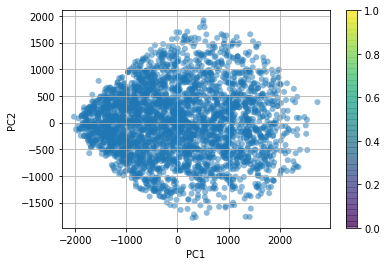

In [7]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(xtrain)
projected2 = pca2.transform(xtrain)#projecting the data onto Principal components
i1 = 0 #first principal component
i2 = 1 #second principal component
plt.scatter(projected2[:, i1], projected2[:, i2],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()


* NO.4_ii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.


* Answer to No.4_ii: The number of dimensions is 112.

(3000, 784)
(3000, 112)


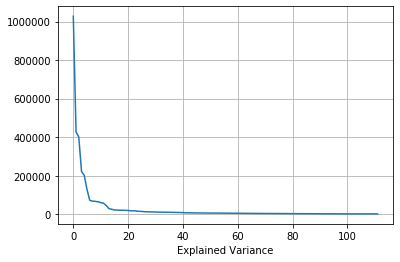

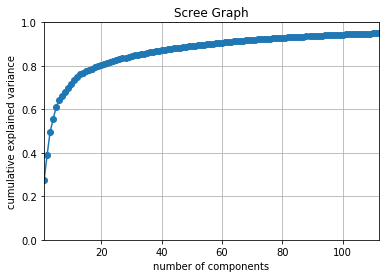

In [8]:
pca95 = PCA(n_components=0.95)
pca95.fit(xtrain)
projected95 = pca95.transform(xtrain)#projecting the data onto Principal components
print(xtrain.shape)
print(projected95.shape)
plt.plot(pca95.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(pca95.explained_variance_ratio_))+1,np.cumsum(pca95.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca95.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()

* NO.4_iii. Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM and XGBoost classification with PCA? Remember to perform hyperparameter optimization!

* NO.4_iii_PCA-Kernelized SVM

In [43]:
#We apply the model of Kernelized SVM we have explored above using the PCA projected data (95% variance)
from sklearn.svm import SVC
param_grid={'degree':[i for i in range(0,5)],'coef0':[1e-2,1e-1,1,10,100]}

pca_ksvm_clf=SVC(kernel='poly')

grid_search = GridSearchCV(pca_ksvm_clf, param_grid, cv = skf)

grid_search.fit(projected95, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/loc

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.749
{'coef0': 1, 'degree': 4}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


* NO.4_iii_PCA-XGBoost

In [5]:
#if the following bolck get error of “NO module named 'xgboost'”,then should install xgboost package
pip install xgboost

  Using cached https://files.pythonhosted.org/packages/5e/49/b95c037b717b4ceadc76b6e164603471225c27052d1611d5a2e832757945/xgboost-0.90-py2.py3-none-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [9]:
#In this block, we try to see the performance without changing the default parameters,using XGBoost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=5,shuffle = True)
param_grid={}

pca_xgb_clf=XGBClassifier()

grid_search = GridSearchCV(pca_xgb_clf, param_grid, cv = skf)

grid_search.fit(projected95, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.7893333333333333
{}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [10]:
#In this block, we apply 'colsample_bytree' to reduce overfitting and 'max_depth'to avoid underfitting,using XGBoost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=5,shuffle = True)
param_grid={'colsample_bytree':[0.5,1],'max_depth':[5,6,7]}

pca_xgb_clf=XGBClassifier()

grid_search = GridSearchCV(pca_xgb_clf, param_grid, cv = skf)

grid_search.fit(projected95, ytrain)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.798
{'colsample_bytree': 0.5, 'max_depth': 5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


* Question No. 5 [5 Marks]
Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any
tools at your disposal. However, no external data sources may be used. Describe your pipeline and
report your results over the test data set. (You are required to submit your prediction file together
with the assignment in a zip folder). Your prediction file should be a single column file containing the
prediction score of the corresponding example in Xtest (be sure to have the same order!). Your
prediction file should be named by your student ID, e.g., u100011.csv.

In [12]:
#In this block, we use pipeline to implement preprocessing using scaler and then pass the data to KNN-Classifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
scaler = preprocessing.StandardScaler()
pipe_clf = Pipeline([('sc',scaler),('clf',KNeighborsClassifier(n_neighbors=6,weights="distance"))] )
pipe_clf.fit(xtrain,ytrain)
ypredict=pipe_clf.predict(test)
np.savetxt("u1952003_1.csv",ypredict,fmt = '%i')

#This is the pipeline used for the final submitted file. The data is preprocessd by standadization and use K neighbor classifier as the classifier.

In [13]:
#Added the PCA process after preprocessing using scaler and then pass the data to KNN-Classifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
scaler = preprocessing.StandardScaler()
pipe_clf = Pipeline([('sc',scaler),('pca',PCA(n_components=112)),('clf',KNeighborsClassifier(n_neighbors=6,weights="distance"))] )
pipe_clf.fit(xtrain,ytrain)
ypredict=pipe_clf.predict(test)
np.savetxt("u1952003_2.csv",ypredict,fmt = '%i')


In [14]:
#Added the PCA process after preprocessing using scaler and then pass the data to XGBoost-Classifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
scaler = preprocessing.StandardScaler()
pipe_clf = Pipeline([('sc',scaler),('pca',PCA(n_components=112)),('clf',XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1))] )
pipe_clf.fit(xtrain,ytrain)
ypredict=pipe_clf.predict(test)
np.savetxt("u1952003_3.csv",ypredict,fmt = '%i')

